In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

stock_code = "2330.TW"
start_date = "2014-02-18"
end_date = "2023-02-18"

# 使用yfinance獲取股票數據
stock_data = yf.download(stock_code, start=start_date, end=end_date)

# 查看數據
print(stock_data.head())

C:\Users\User\anaconda3\envs\AIlearn\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

             Open   High    Low  Close  Adj Close    Volume
Date                                                       
2014-02-18  108.5  108.5  107.5  108.0  80.316833  22196000
2014-02-19  108.0  108.0  107.0  108.0  80.316833  26867000
2014-02-20  106.5  107.0  106.0  106.5  79.201324  28429000
2014-02-21  107.0  107.5  107.0  107.5  79.944992  31448000
2014-02-24  107.5  108.0  106.0  107.0  79.573158  32033000


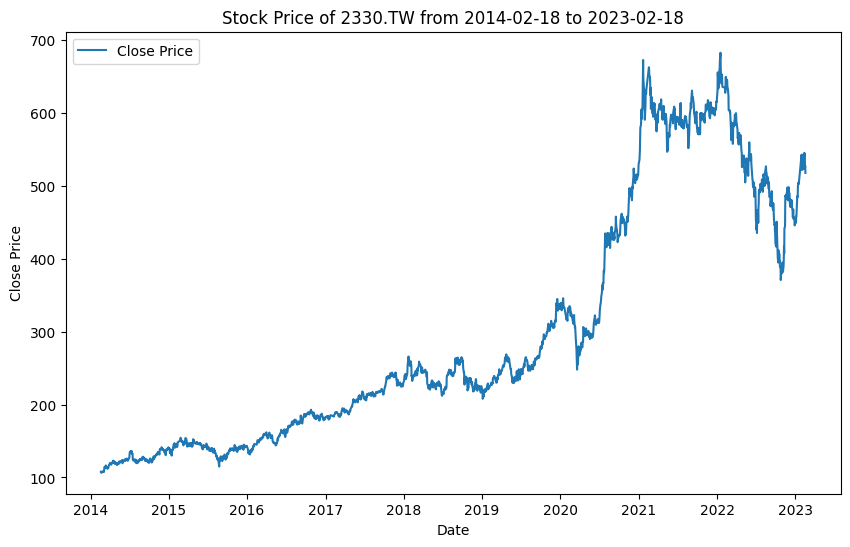

In [2]:
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price')
plt.title(f'Stock Price of {stock_code} from {start_date} to {end_date}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [3]:
data = stock_data['Close'].reset_index()
data = data['Close']
print(data)

data_norm = data/max(data)
print(data_norm)

0       108.0
1       108.0
2       106.5
3       107.5
4       107.0
        ...  
2195    541.0
2196    545.0
2197    525.0
2198    528.0
2199    518.0
Name: Close, Length: 2200, dtype: float64
0       0.158126
1       0.158126
2       0.155930
3       0.157394
4       0.156662
          ...   
2195    0.792094
2196    0.797950
2197    0.768668
2198    0.773060
2199    0.758419
Name: Close, Length: 2200, dtype: float64


In [4]:
def extra_data(data,time_step):
    x = []
    y = []
    for i in range(len(data)-time_step):
        x.append([a for a in data[i:i+time_step]]) # a1 = [1,2,.....8] a2 = [2,3,.....9]
        y.append(data[i+time_step])
    x = np.array(x)
    x = x.reshape(x.shape[0],x.shape[1],1)      #(2432, 8) ->  (2432, 8, 1)
    y = np.array(y)
    return x,y
    

In [5]:
time_step = 8
x,y = extra_data(data_norm,time_step)
print(x.shape)
print(x)

(2192, 8, 1)
[[[0.15812592]
  [0.15812592]
  [0.15592972]
  ...
  [0.15812592]
  [0.15739385]
  [0.15812592]]

 [[0.15812592]
  [0.15592972]
  [0.15739385]
  ...
  [0.15739385]
  [0.15812592]
  [0.15812592]]

 [[0.15592972]
  [0.15739385]
  [0.15666179]
  ...
  [0.15812592]
  [0.15812592]
  [0.15739385]]

 ...

 [[0.79355783]
  [0.77013177]
  [0.76573939]
  ...
  [0.79795022]
  [0.7920937 ]
  [0.79795022]]

 [[0.77013177]
  [0.76573939]
  [0.79062958]
  ...
  [0.7920937 ]
  [0.79795022]
  [0.76866764]]

 [[0.76573939]
  [0.79062958]
  [0.79062958]
  ...
  [0.79795022]
  [0.76866764]
  [0.77306003]]]


In [6]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN
model = Sequential()
model.add(SimpleRNN(units=1,input_shape=(time_step,1),activation='relu'))
model.add(Dense(units=1,activation='linear'))
model.compile(optimizer='adam',loss= 'mean_squared_error')
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1)                 3         
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
print(x.shape,len(y))

(2192, 8, 1) 2192


In [8]:
model.fit(x,y,batch_size=30,epochs=200)

Epoch 1/200

74/74 [==============================] - 1s 1ms/step - loss: 0.1404
Epoch 2/200
74/74 [==============================] - 0s 877us/step - loss: 0.0295
Epoch 3/200
74/74 [==============================] - 0s 842us/step - loss: 0.0086
Epoch 4/200
74/74 [==============================] - 0s 822us/step - loss: 0.0064
Epoch 5/200
74/74 [==============================] - 0s 811us/step - loss: 0.0053
Epoch 6/200
74/74 [==============================] - 0s 805us/step - loss: 0.0042
Epoch 7/200
74/74 [==============================] - 0s 829us/step - loss: 0.0032
Epoch 8/200
74/74 [==============================] - 0s 815us/step - loss: 0.0024
Epoch 9/200
74/74 [==============================] - 0s 822us/step - loss: 0.0017
Epoch 10/200
74/74 [==============================] - 0s 840us/step - loss: 0.0012
Epoch 11/200
74/74 [==============================] - 0s 819us/step - loss: 9.0435e-04
Epoch 12/200
74/74 [==============================] - 0s 834us/step - loss: 6.7722e-04
Epoch 

In [9]:
y_train_predict = model.predict(x)*max(data)
y_train = y*max(data)

69/69 [==============================] - 0s 971us/step


In [10]:
print(y_train_predict.shape)
print(y_train.shape)

(2192, 1)
(2192,)


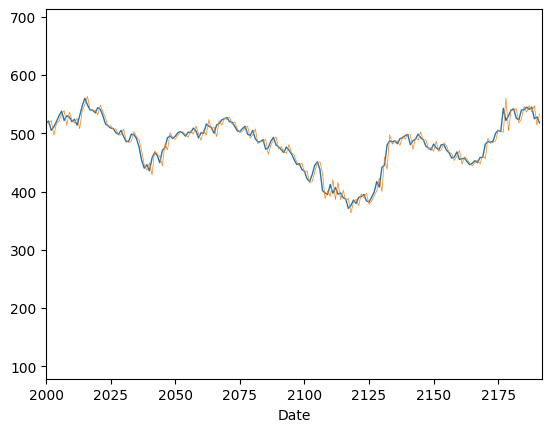

In [11]:
plt.plot(y_train,label='real',linewidth=1)
plt.plot(y_train_predict,label='pre',linewidth=0.5)
plt.xlabel('Date')
plt.xlim(2000,2192)
plt.show()

C:\Users\User\anaconda3\envs\AIlearn\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
C:\Users\User\anaconda3\envs\AIlearn\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

             Open   High    Low  Close  Adj Close     Volume
Date                                                        
2024-01-02  590.0  593.0  589.0  593.0      593.0   26059058
2024-01-03  584.0  585.0  576.0  578.0      578.0   37106763
2024-01-04  580.0  581.0  577.0  580.0      580.0   15309129
2024-01-05  578.0  580.0  574.0  576.0      576.0   18158971
2024-01-08  582.0  585.0  579.0  583.0      583.0   17761275
2024-01-09  588.0  589.0  583.0  586.0      586.0   22501510
2024-01-10  581.0  586.0  580.0  584.0      584.0   13037716
2024-01-11  586.0  589.0  583.0  586.0      586.0   23997409
2024-01-12  581.0  588.0  581.0  584.0      584.0   16496053
2024-01-15  590.0  590.0  585.0  586.0      586.0   21143076
2024-01-16  581.0  588.0  579.0  580.0      580.0   27223860
2024-01-17  583.0  584.0  578.0  581.0      581.0   42592335
2024-01-18  586.0  589.0  585.0  588.0      588.0   27209996
2024-01-19  625.0  627.0  614.0  626.0      626.0  161106401
2024-01-22  633.0  633.0

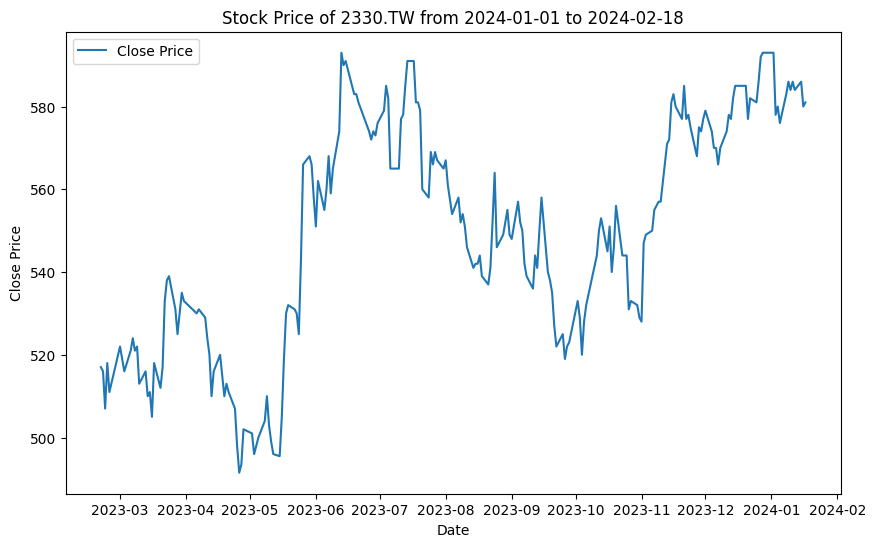

In [82]:
####################### test data


stock_code = "2330.TW"
start_date = "2023-02-18"
end_date = "2024-01-18"

test= yf.download(stock_code, start=start_date, end=end_date)


stock_code = "2330.TW"
start_date = "2024-01-01"
end_date = "2024-02-18"

real = yf.download(stock_code, start=start_date, end=end_date)

print(real)
plt.figure(figsize=(10, 6))
plt.plot(test.index, stock_data_2['Close'], label='Close Price')
plt.title(f'Stock Price of {stock_code} from {start_date} to {end_date}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [83]:
data2 = test['Close'].reset_index()
data2 = data2['Close']

real = real['Close'].reset_index()
real = real['Close']



data2_norm = data2/max(data)   # nomalize use same data can't use data2
real_norm = real/max(data)

x_test_norm,y_test_norm = extra_data(data2_norm,time_step)
x_real_norm,y_real_norm = extra_data(real_norm,time_step)

print(x_test_norm.shape,y_test_norm.shape)
print(x_real_norm.shape,y_real_norm.shape)

(217, 8, 1) (217,)
(19, 8, 1) (19,)


In [65]:
y_test_pre = model.predict(x_test_norm)*max(data)
y_test = y_test_norm*max(data)

print(y_test_pre.shape)
print(y_test.shape)

7/7 [==============================] - 0s 1ms/step
(217, 1)
(217,)


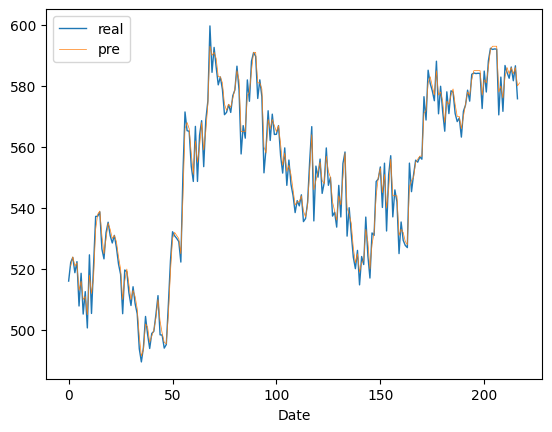

In [84]:
x_data = np.arange(len(y_test))

plt.plot(x_data,y_test_pre,label='real',linewidth=1)
plt.plot(x_data+1,y_test,label='pre',linewidth=0.5)
plt.xlabel('Date')
plt.legend()
# plt.xlim(200,250)
plt.show()


In [121]:
y_pre = []
x1=x_test_norm

pre = x1[-1][0]
for i in range(80):
    
    x1_flattened = x1.flatten()
    new_element = pre
    y_pre.append(pre)
    modified_list = np.delete(x1_flattened, 0) 
    modified_list = np.append(modified_list, new_element) 
    modified_arr = modified_list.reshape(217, time_step, 1)    
    new = model.predict(modified_arr) 
    
    pre = new[-1][0]
    x1 = modified_arr
    
print(y_pre)

7/7 [==============================] - 0s 1ms/step
[array([0.84333821]), 0.8416003, 0.8397088, 0.83781374, 0.8359304, 0.8340466, 0.83217466, 0.83030206, 0.8284534, 0.82662255, 0.82480067, 0.8229882, 0.8211851, 0.8193913, 0.81760675, 0.8158315, 0.81406546, 0.81230855, 0.8105607, 0.80882186, 0.80709195, 0.805371, 0.8036589, 0.8019557, 0.8002612, 0.79857546, 0.7968984, 0.7952301, 0.79357034, 0.7919191, 0.7902764, 0.7886422, 0.78701645, 0.7853991, 0.78379005, 0.78218925, 0.78059673, 0.7790124, 0.7774362, 0.7758682, 0.77430826, 0.7727564, 0.77121246, 0.76967657, 0.7681486, 0.76662844, 0.7651162, 0.76361185, 0.76211524, 0.7606263, 0.7591451, 0.7576714, 0.75620544, 0.75474703, 0.753296, 0.75185245, 0.7504164, 0.74898773, 0.7475665, 0.74615264, 0.744746, 0.74334663, 0.74195445, 0.74056953, 0.73919165, 0.7378209, 0.7364573, 0.7351007, 0.7337511, 0.7324084, 0.73107266, 0.72974384, 0.7284219, 0.72710675, 0.7257983, 0.7244967, 0.7232019, 0.72191364, 0.7206321, 0.719357]


0.8416003


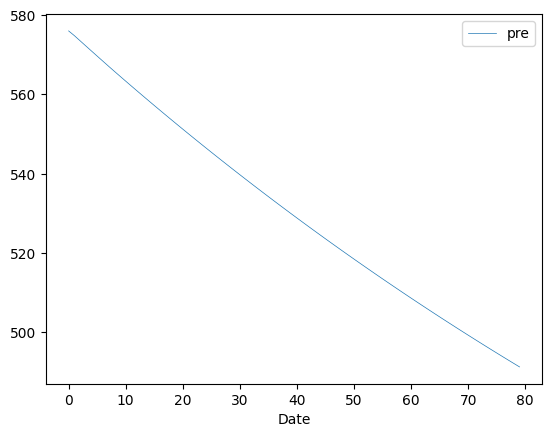

In [125]:
print(y_pre[1])

y_pre_processed = [y[0] if isinstance(y, np.ndarray) else y for y in y_pre]
y_pre_array = np.array(y_pre_processed)
y_pre = y_pre_array*max(data)

plt.plot(y_pre,label='pre',linewidth=0.5)
plt.xlabel('Date')
plt.legend()
# plt.xlim(200,250)
plt.show()

In [91]:
y_pre = []

x1 = x_test_norm[-1]
for i in range(20):
    x1 = x1.reshape(1,time_step,1) 
    pre = model.predict(x1)
    y_pre.append(pre[0][0])
    
    new = np.delete(x1,0)
    new = np.append(new,pre)
    new = new.reshape(1,time_step,1)
    x1 = new
print(y_pre)

1/1 [==============================] - 0s 18ms/step
[0.8430271, 0.8411527, 0.8392625, 0.83736867, 0.83548665, 0.8336041, 0.83173335, 0.829862, 0.8280146, 0.8261856, 0.8243659, 0.8225557, 0.8207549, 0.8189633, 0.81718093, 0.8154078, 0.8136439, 0.8118891, 0.81014335, 0.80840665]


[0.8430271  0.8411527  0.8392625  0.83736867 0.83548665 0.8336041
 0.83173335 0.829862   0.8280146  0.8261856  0.8243659  0.8225557
 0.8207549  0.8189633  0.81718093 0.8154078  0.8136439  0.8118891
 0.81014335 0.80840665]


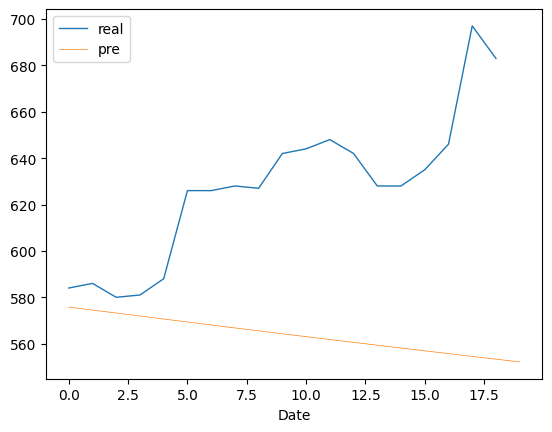

In [92]:
y_pre = np.array(y_pre)
print(y_pre)
y_pre = y_pre*max(data)
y_real = y_real_norm*max(data)

plt.plot(y_real,label='real',linewidth=1)
plt.plot(y_pre,label='pre',linewidth=0.5)
plt.xlabel('Date')
plt.legend()
# plt.xlim(200,250)
plt.show()